# Using low pass whole metagenome sequencing for gut microbiome profiling in an Argentine urban population

In [1]:
!conda install seaborn scipy statsmodels --y

Retrieving notices: done
Channels:
 - defaults
 - conda-forge
Platform: win-64
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\milagros.trotta\AppData\Local\anaconda3\envs\cazymes

  added / updated specs:
    - scipy
    - seaborn
    - statsmodels


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2025.4.26          |  py312haa95532_0         158 KB
    scipy-1.15.3               |  py312h180bac5_0        26.0 MB
    seaborn-0.13.2             |  py312haa95532_2         723 KB
    ------------------------------------------------------------
                                           Total:        26.8 MB

The following packages will be UPDATED:

  certifi                         2025.1.31-py312haa95532_0 --> 2025.4.26-py312haa95532_0 
  scipy                              1.15.1-py312hbb039d4_0 --> 1.15.3-py312h180bac5_0 
  seaborn   

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.anova import AnovaRM
from scipy.stats import ttest_rel

In [2]:
#import data
df_dbref = pd.read_csv('resource/mxmarkers_referencia.csv')
df_rewell = pd.read_csv('resource/rewellmxmarkers_total_lecturas.csv')

In [3]:
#add group tag
df_dbref['grupo'] = 'Reference'
df_rewell['grupo'] = 'Average'

In [4]:
#combined the datasets
df_combined = pd.concat([df_dbref, df_rewell], axis=0).reset_index(drop=True)

## T-test analysis for each marker


Mean and SEM TMA:
Average: Mean = 69.176, SEM = 2.328
Reference: Mean = 75.223, SEM = 6.292

T-test result for TMA:
Reference database vs Average: p-value = 0.369
Graph save as: comparison_tma_full.png


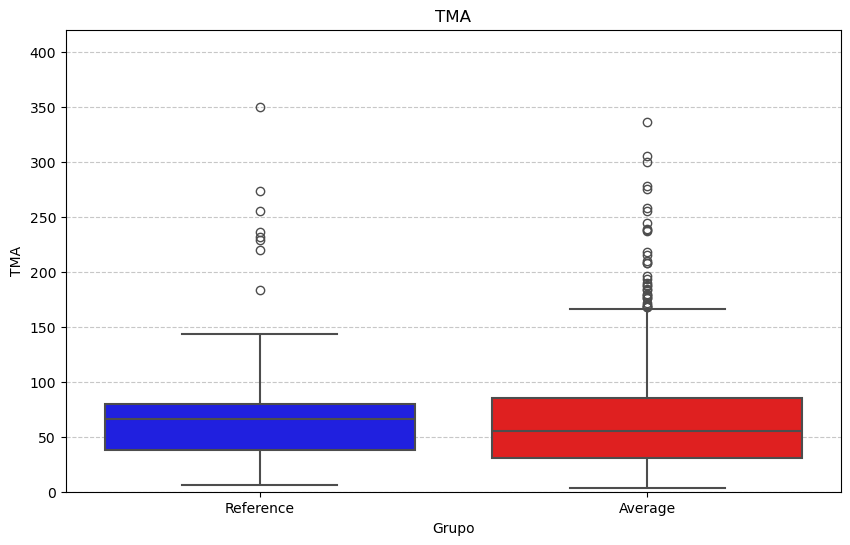


Mean and SEM Diversity:
Average: Mean = 2.711, SEM = 0.016
Reference: Mean = 2.984, SEM = 0.032

T-test result for Diversity:
Reference database vs Average: p-value = 4.17e-12
Graph save as: comparison_divalfa.png


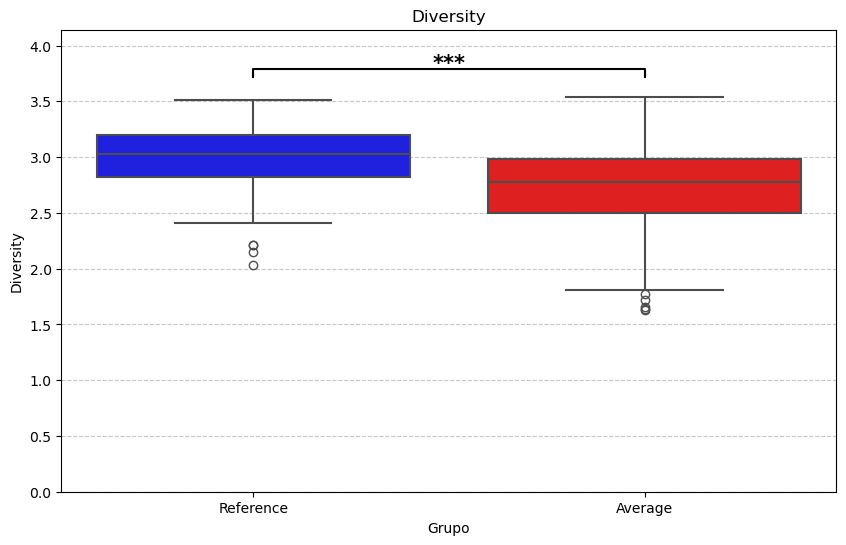


Mean and SEM SCFA:
Average: Mean = 1075.334, SEM = 15.745
Reference: Mean = 1450.957, SEM = 49.026

T-test result for SCFA:
Reference database vs Average: p-value = 4.42e-11
Graph save as: comparison_scfa_full.png


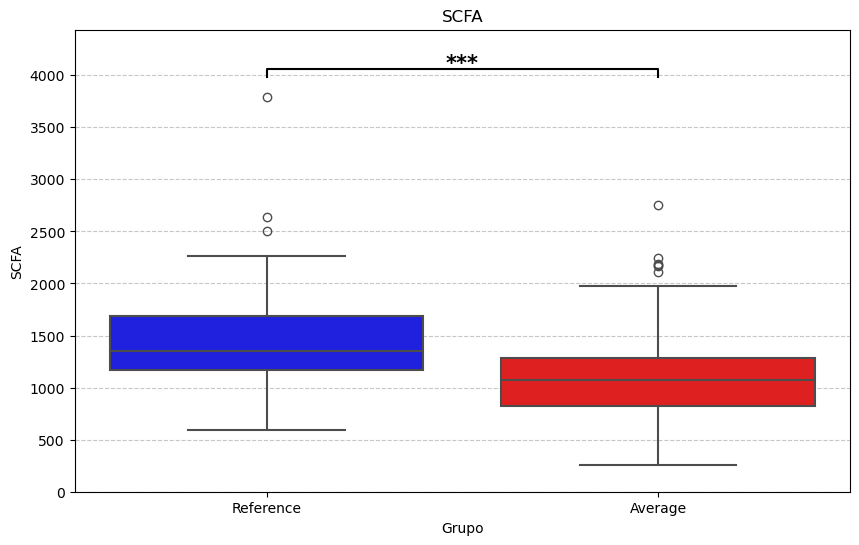


Mean and SEM Richness:
Average: Mean = 344.615, SEM = 3.079
Reference: Mean = 334.340, SEM = 4.661

T-test result for Richness:
Reference database vs Average: p-value = 0.0675
Graph save as: comparison_riqueza.png


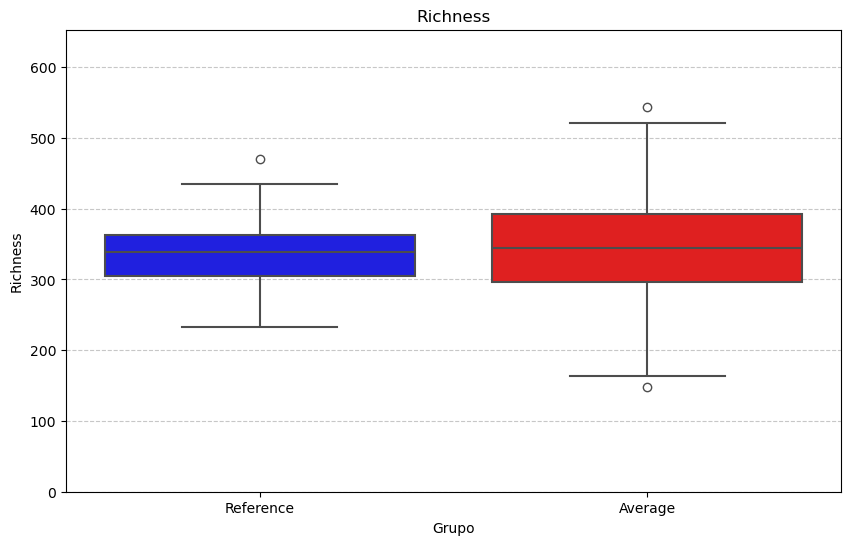


Mean and SEM Evenness:
Average: Mean = 0.465, SEM = 0.002
Reference: Mean = 0.514, SEM = 0.005

T-test result for Evenness:
Reference database vs Average: p-value = 1.81e-16
Graph save as: comparison_evenness.png


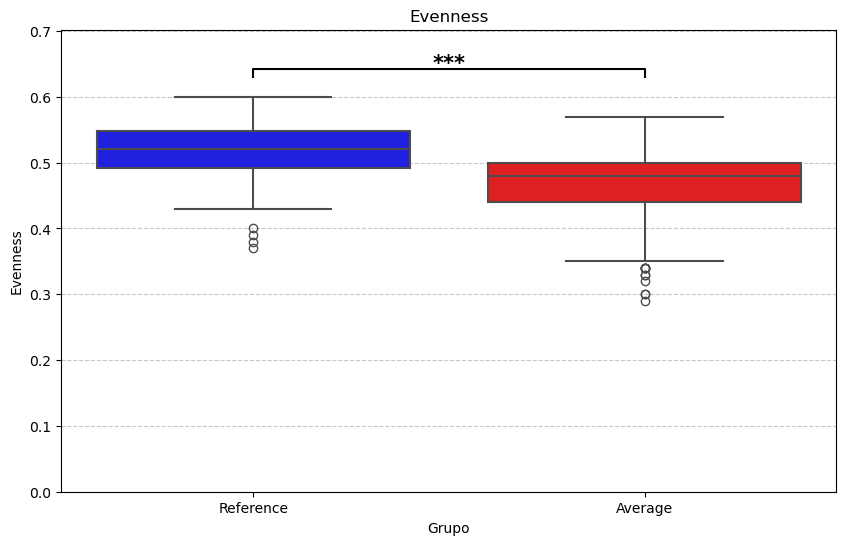


Mean and SEM Vitamin B12:
Average: Mean = 848.721, SEM = 13.183
Reference: Mean = 1097.681, SEM = 29.431

T-test result for Vitamin B12:
Reference database vs Average: p-value = 2.47e-12
Graph save as: comparison_vitaminab12_full.png


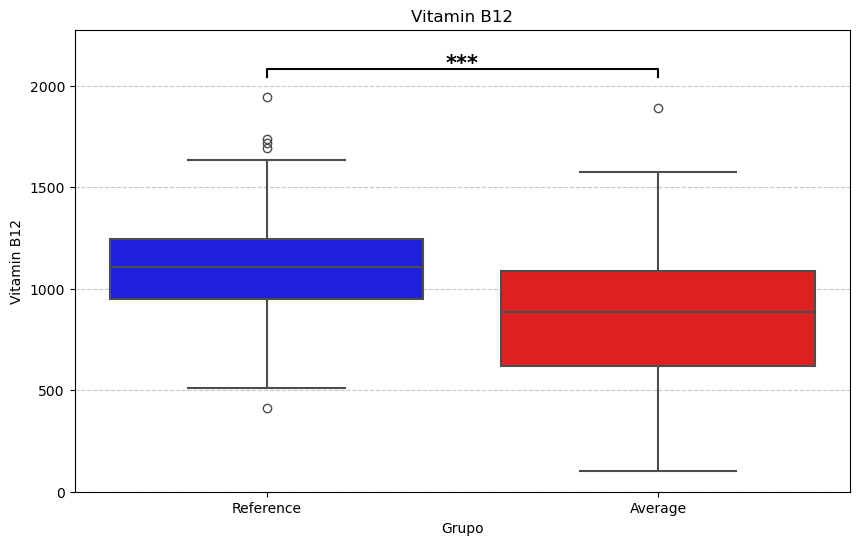


Mean and SEM Vitamin B1:
Average: Mean = 1619.307, SEM = 14.749
Reference: Mean = 1641.872, SEM = 36.570

T-test result for Vitamin B1:
Reference database vs Average: p-value = 0.568
Graph save as: comparison_vitaminab1_full.png


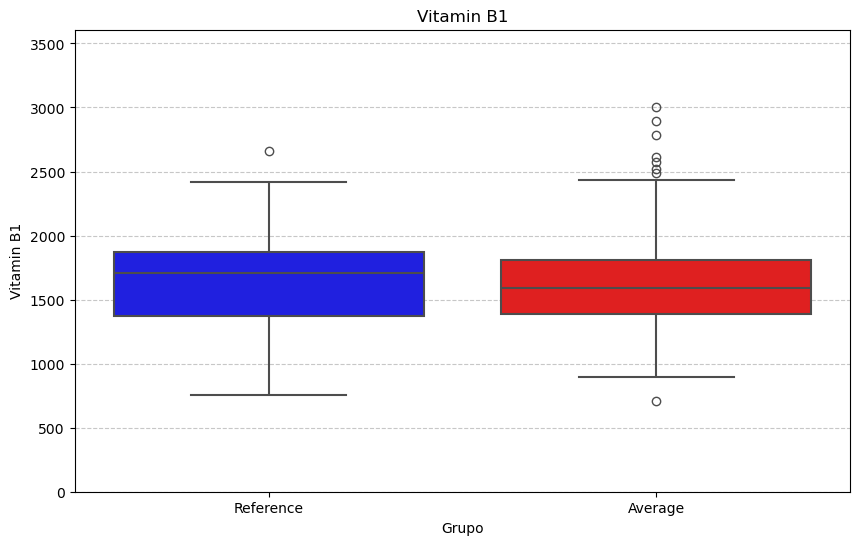


Mean and SEM Vitamin B7:
Average: Mean = 1792.192, SEM = 15.725
Reference: Mean = 1803.989, SEM = 37.739

T-test result for Vitamin B7:
Reference database vs Average: p-value = 0.773
Graph save as: comparison_vitaminab7_full.png


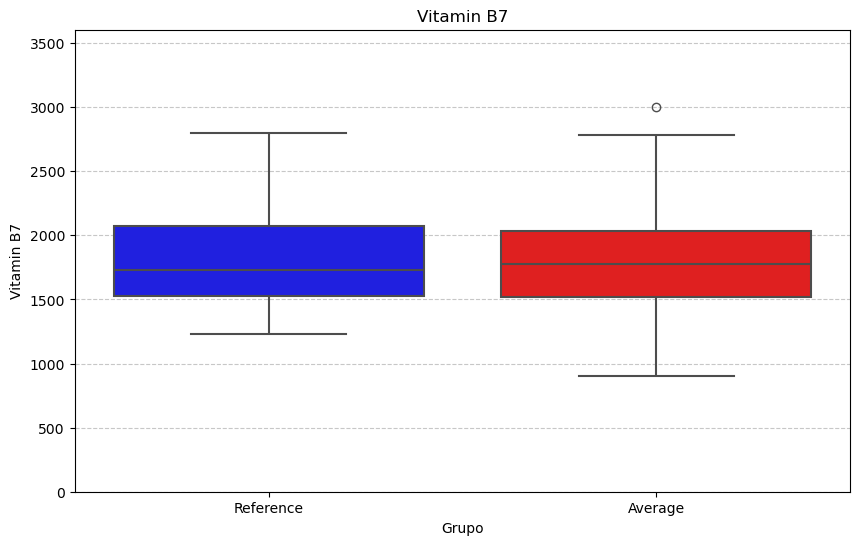


Mean and SEM Vitamin B9:
Average: Mean = 1389.194, SEM = 10.114
Reference: Mean = 1503.362, SEM = 26.515

T-test result for Vitamin B9:
Reference database vs Average: p-value = 0.0001
Graph save as: comparison_vitaminab9_full.png


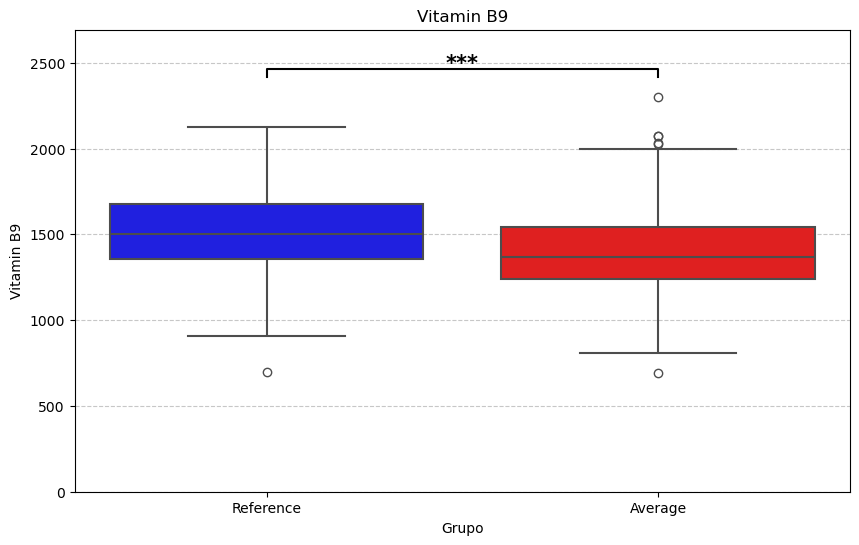


Mean and SEM Vitamin K2:
Average: Mean = 910.030, SEM = 9.989
Reference: Mean = 835.574, SEM = 24.110

T-test result for Vitamin K2:
Reference database vs Average: p-value = 0.00506
Graph save as: comparison_vitaminak2_full.png


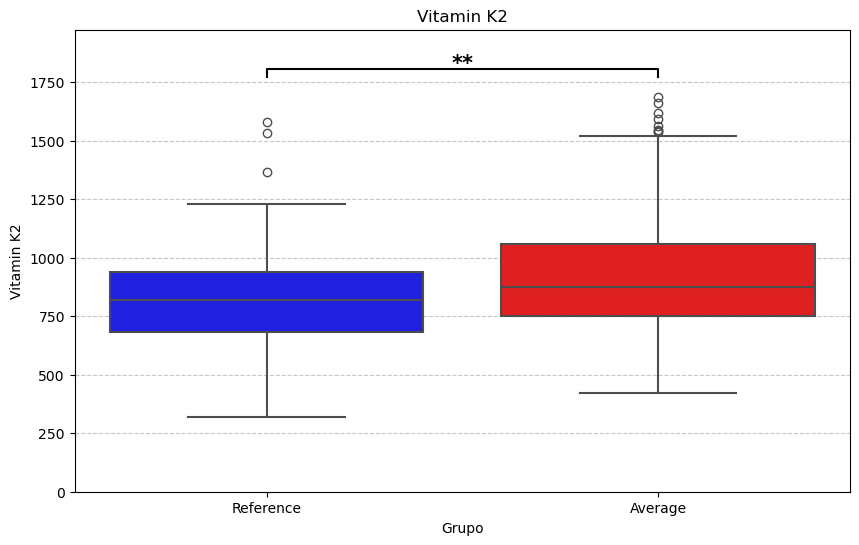

In [5]:
def analizar_variable(y_variable, y_label):
    plt.figure(figsize=(10, 6))

    # create boxplot
    ax = sns.boxplot(
        data=df_combined,
        x='grupo',
        y=y_variable,
        palette={'Reference': 'blue', 'Average': 'red'},
        hue='grupo',
        showmeans=False,
        linewidth=1.5
    )
    
    plt.title(f'{y_label}')
    plt.xlabel('Grupo')
    plt.ylabel(y_label)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # calculate mean and sem
    media_por_grupo = df_combined.groupby('grupo')[y_variable].mean()
    sem_por_grupo = df_combined.groupby('grupo')[y_variable].sem()
    
    print(f"\nMean and SEM {y_label}:")
    for grupo in media_por_grupo.index:
        print(f"{grupo}: Mean = {media_por_grupo[grupo]:.3f}, SEM = {sem_por_grupo[grupo]:.3f}")

    # T-test between groups
    dbref = df_dbref[y_variable]
    rewell = df_rewell[y_variable]
    t_stat, p_value = stats.ttest_ind(dbref, rewell, equal_var=False)

    print(f"\nT-test result for {y_label}:")
    print(f"Reference database vs Average: p-value = {p_value:.3g}")

    # Graphic set
    y_max = df_combined[y_variable].max()
    text_height = y_max + (y_max * 0.1)

    # Significance
    if p_value < 0.001:
        significance = '***'
    elif p_value < 0.01:
        significance = '**'
    elif p_value < 0.05:
        significance = '*'
    else:
        significance = None

    if significance:
        #graph settings
        x1, x2 = 0, 1  
        line_height = y_max + (y_max * 0.05)  
        text_height = line_height + (y_max * 0.02) 

        
        plt.plot(
            [x1, x1, x2, x2], 
            [line_height, line_height + (y_max * 0.02), line_height + (y_max * 0.02), line_height],  
            lw=1.5, color='black'
        )
        
       
        plt.text(
            (x1 + x2) / 2,  
            text_height,
            significance, 
            ha='center', 
            color='black', 
            fontsize=15, 
            fontweight='bold'
        )

    
    ax.set_ylim(0, text_height + (y_max * 0.1))

    
    # Export graph in PNG
    file_name = f"comparison_{y_variable}.png"
    plt.savefig(file_name, format='png', dpi=300, bbox_inches='tight')
    print(f"Graph save as: {file_name}")

    # Show graph
    plt.show()

# var to analyze
variables = {
    'tma_full': 'TMA',
    'divalfa': 'Diversity',
    'scfa_full': 'SCFA',
    'riqueza': 'Richness',
    'evenness': 'Evenness',
    'vitaminab12_full': 'Vitamin B12',
    'vitaminab1_full': 'Vitamin B1',
    'vitaminab7_full': 'Vitamin B7',
    'vitaminab9_full': 'Vitamin B9',
    'vitaminak2_full': 'Vitamin K2'
}

# Execute for each var
for var, label in variables.items():
    analizar_variable(var, label)


## Anlysis of habits changes effect in gut microbiome

In [17]:
mx_combined = pd.read_csv("resource/mx_combined.csv")

In [18]:
# User map
user_map = {
    'B000610': 'US01',
    'B000501': 'US01',
    'A049611': 'US02',
    'B001302': 'US02',
    'A143406': 'US03',
    'B002702': 'US03',
    'A048102': 'US04',
    'B003808': 'US04',
    'A000610': 'US05',
    'B001509': 'US05',
    'A003710': 'US06',
    'B001204': 'US06',
    'A014605': 'US07',
    'B002506': 'US07',
    'Z032908': 'US08',
    'B002103': 'US08',
    'A027810': 'US09',
    'B002408': 'US09'
}

In [19]:
# creat new column with user
mx_combined['id_usuario'] = mx_combined['kit_padre_id'].map(user_map)


In [20]:
#map of pre and post meassures
kits_pre = {
    'US01': 'B000610',
    'US02': 'A049611',
    'US03': 'A143406',
    'US04': 'A048102',
    'US05': 'A000610',
    'US06': 'A003710',
    'US07': 'A014605',
    'US08': 'Z032908',
    'US09': 'A027810'
}
kits_post = {
    'US01': 'B000501',
    'US02': 'B001302',
    'US03': 'B002702',
    'US04': 'B003808',
    'US05': 'B001509',
    'US06': 'B001204',
    'US07': 'B002506',
    'US08': 'B002103',
    'US09': 'B002408'
}


Paired T-Test Results (T0 vs T1):
t-statistic: -1.9736, p-value: 0.0839
The changes between T0 and T1 are not statistically significant (p >= 0.05).
Gráfico guardado como: evolution_alpha_diversity.png


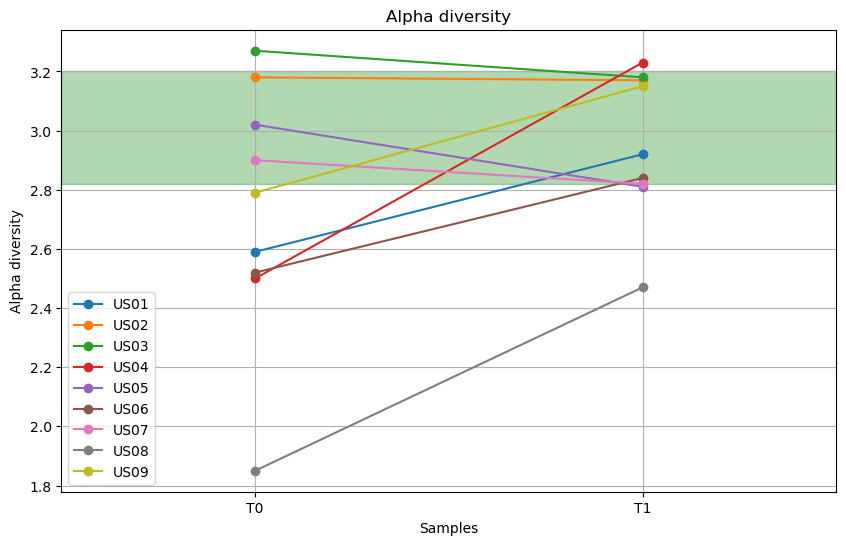

In [21]:
data_to_plot_divalfa = []

for usuario in kits_pre.keys():
    kit_pre = kits_pre[usuario]  
    kit_post = kits_post[usuario] 

    # Filtrar para obtener los datos de pre-buritato
    pre_totales = mx_combined[
        (mx_combined['id_usuario'] == usuario) & (mx_combined['kit_padre_id'] == kit_pre)
    ]

    # Filtrar para obtener los datos de post-buritato
    post_totales = mx_combined[
        (mx_combined['id_usuario'] == usuario) & (mx_combined['kit_padre_id'] == kit_post)
    ]

    if not pre_totales.empty and not post_totales.empty:
        pre_divalfa = pre_totales['divalfa'].values[0]
        post_divalfa = post_totales['divalfa'].values[0]
        data_to_plot_divalfa.append((usuario, pre_divalfa, post_divalfa))


# Convertir la lista a un DataFrame para facilitar la graficación
plot_divalfa = pd.DataFrame(data_to_plot_divalfa, columns=['Usuario', 'Pre', 'Post'])

# Realizar t-test pareado para el grupo completo
t_stat, p_value = ttest_rel(plot_divalfa['Pre'], plot_divalfa['Post'])

# Imprimir los resultados del t-test
print("Paired T-Test Results (T0 vs T1):")
print(f"t-statistic: {t_stat:.4f}, p-value: {p_value:.4f}")

# Declarar significancia
if p_value < 0.05:
    print("The changes between T0 and T1 are statistically significant (p < 0.05).")
else:
    print("The changes between T0 and T1 are not statistically significant (p >= 0.05).")


# Graficar
plt.figure(figsize=(10, 6))

# Graficar cada usuario
for _, row in plot_divalfa.iterrows():
    plt.plot([1, 2], [row['Pre'], row['Post']], marker='o', label=row['Usuario'])

# Sombrear la región desde x=0.53 a x=1.78 en gris claro
plt.axhspan(2.82, 3.2, color='green', alpha=0.3)  # alpha controla la transparencia

# Configuración del gráfico
plt.title('Alpha diversity')
plt.xlabel('Samples')
plt.ylabel('Alpha diversity')
plt.xticks([1, 2], ['T0', 'T1'])
plt.xlim(0.5, 2.5)
plt.legend()
plt.grid(True)
file_name = "evolution_alpha_diversity.png"
plt.savefig(file_name, format='png', dpi=300, bbox_inches='tight')
print(f"Gráfico guardado como: {file_name}")

plt.show()

In [ ]:
kits_pre = {
    'US01': 'B000610',
    'US02': 'A049611',
    'US03': 'A143406',
    'US04': 'A048102',
    'US05': 'A000610',
    'US06': 'A003710',
    'US07': 'A014605',
    'US08': 'Z032908',
    'US09': 'A027810'
}
kits_post_totales = {
    'US01': 'B000501',
    'US02': 'B001302',
    'US03': 'B002702',
    'US04': 'B003808',
    'US05': 'B001509',
    'US06': 'B001204',
    'US07': 'B002506',
    'US08': 'B002103',
    'US09': 'B002408'
}

# Crear una grilla para almacenar los datos a graficar
data_to_plot_richness = []

for usuario in kits_pre.keys():
    kit_pre = kits_pre[usuario]  
    kit_post = kits_post[usuario] 

    # Filtrar para obtener los datos de pre-buritato
    pre_totales = mx_combined[
        (mx_combined['id_usuario'] == usuario) & (mx_combined['kit_padre_id'] == kit_pre)
    ]

    # Filtrar para obtener los datos de post-buritato
    post_totales = mx_combined[
        (mx_combined['id_usuario'] == usuario) & (mx_combined['kit_padre_id'] == kit_post)
    ]

    if not pre_totales.empty and not post_totales.empty:
        pre_richness = pre_totales['riqueza'].values[0]
        post_richness = post_totales['riqueza'].values[0]
        data_to_plot_richness.append((usuario, pre_richness, post_richness))

plot_richness = pd.DataFrame(data_to_plot_richness, columns=['Usuario', 'Pre', 'Post'])

t_stat, p_value = ttest_rel(plot_richness['Pre'], plot_richness['Post'])

# Imprimir los resultados del t-test
print("Paired T-Test Results (T0 vs T1):")
print(f"t-statistic: {t_stat:.4f}, p-value: {p_value:.4f}")

# Declarar significancia
if p_value < 0.05:
    print("The changes between T0 and T1 are statistically significant (p < 0.05).")
else:
    print("The changes between T0 and T1 are not statistically significant (p >= 0.05).")

# Graficar
plt.figure(figsize=(10, 6))

# Graficar cada usuario
for _, row in plot_richness.iterrows():
    plt.plot([1, 2], [row['Pre'], row['Post']], marker='o', label=row['Usuario'])

# Sombrear la región desde x=0.53 a x=1.78 en gris claro
plt.axhspan(332.8, 391.8, color='green', alpha=0.3)  # alpha controla la transparencia


# Configuración del gráfico
plt.title('Richness')
plt.xlabel('Samples')
plt.ylabel('Richness')
plt.xticks([1, 2], ['T0', 'T1'])
plt.xlim(0.5, 2.5)
plt.legend()
plt.grid(True)
file_name = "evolution_richness.png"
plt.savefig(file_name, format='png', dpi=300, bbox_inches='tight')
print(f"Gráfico guardado como: {file_name}")

plt.show()


[riqueza] Paired T-Test Results (T0 vs T1):
t-statistic: -4.1906, p-value: 0.0030
→ Statistically significant change (p < 0.05)
Figure saved as: evolution_riqueza.png


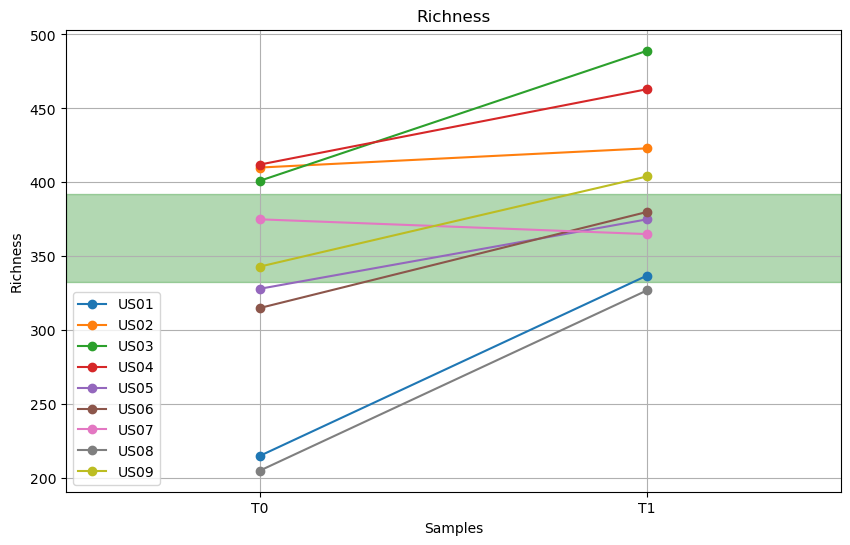


[divalfa] Paired T-Test Results (T0 vs T1):
t-statistic: -1.9736, p-value: 0.0839
→ Not statistically significant (p ≥ 0.05)
Figure saved as: evolution_divalfa.png


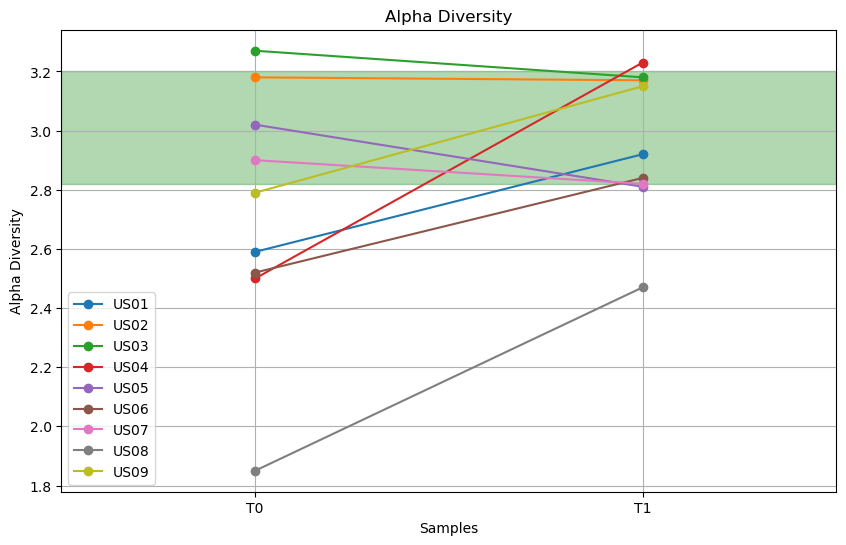


[scfa_full] Paired T-Test Results (T0 vs T1):
t-statistic: -2.9252, p-value: 0.0191
→ Statistically significant change (p < 0.05)
Figure saved as: evolution_scfa_full.png


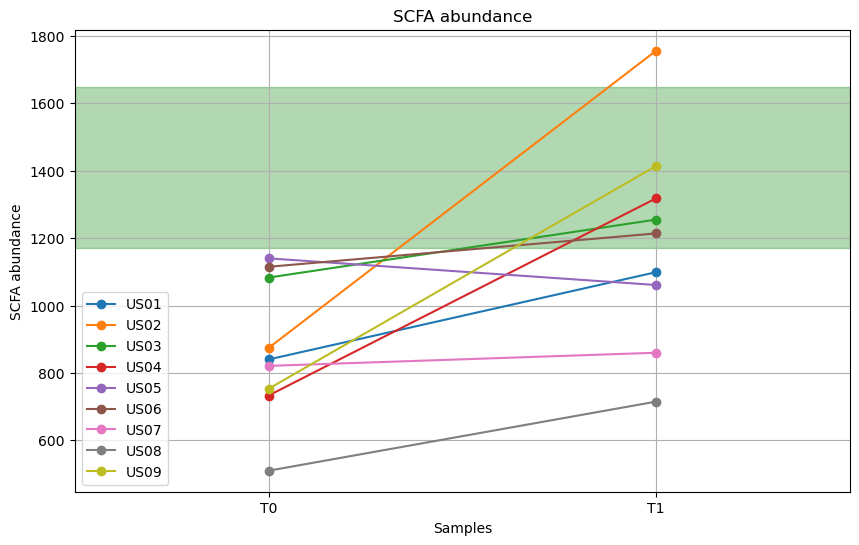


[evenness] Paired T-Test Results (T0 vs T1):
t-statistic: -1.2164, p-value: 0.2585
→ Not statistically significant (p ≥ 0.05)
Figure saved as: evolution_evenness.png


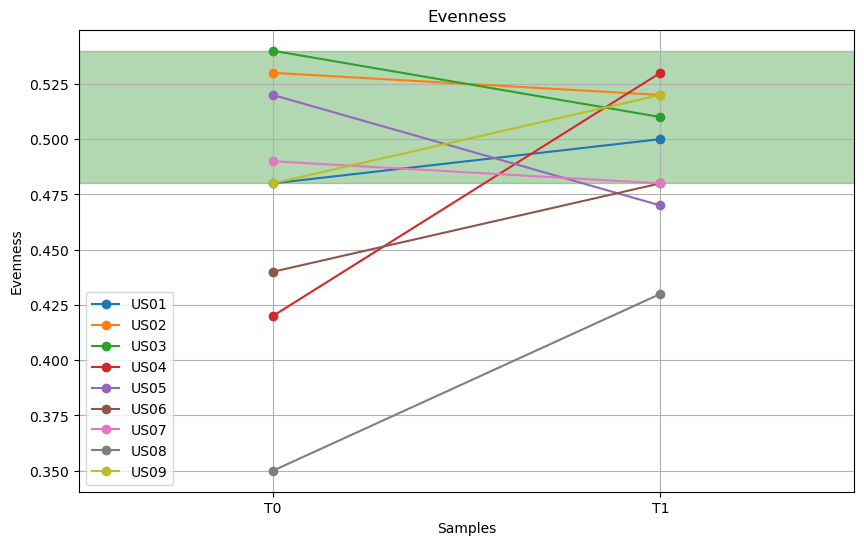


[tma_full] Paired T-Test Results (T0 vs T1):
t-statistic: 0.4880, p-value: 0.6386
→ Not statistically significant (p ≥ 0.05)
Figure saved as: evolution_tma_full.png


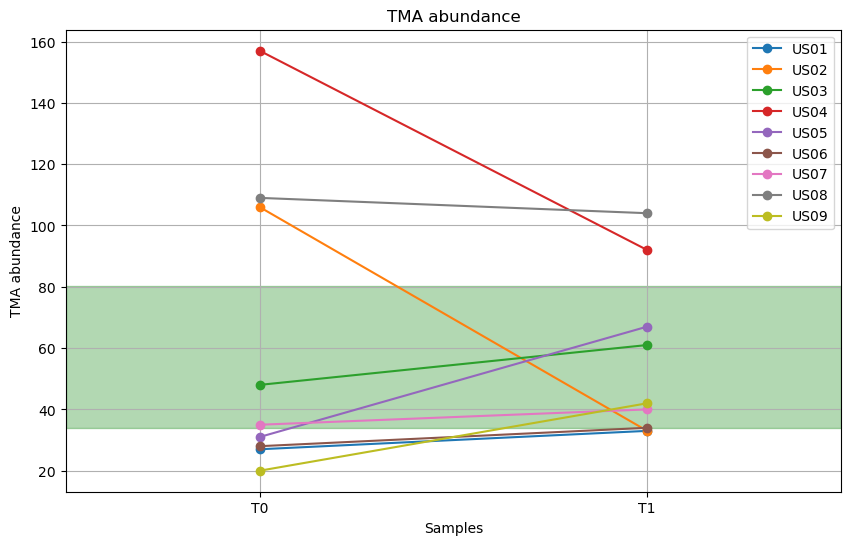


[vitaminab12_full] Paired T-Test Results (T0 vs T1):
t-statistic: -2.1646, p-value: 0.0623
→ Not statistically significant (p ≥ 0.05)
Figure saved as: evolution_vitaminab12_full.png


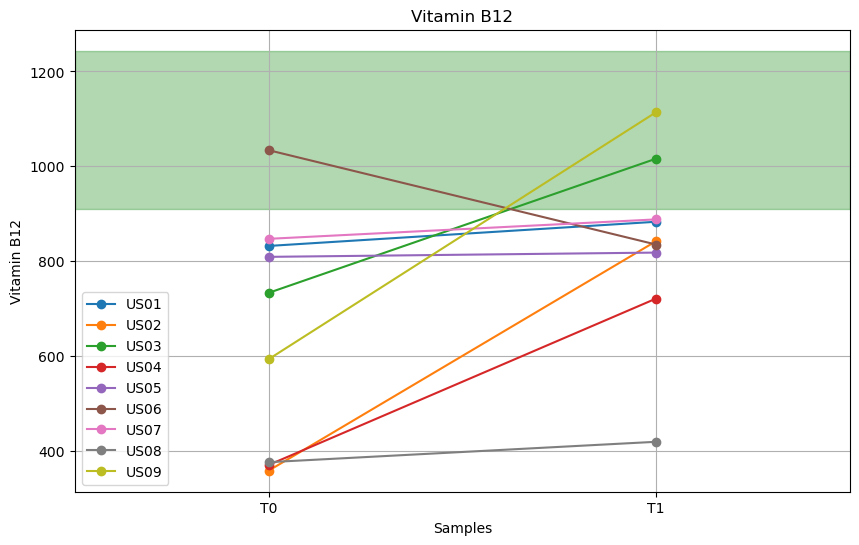


[vitaminab1_full] Paired T-Test Results (T0 vs T1):
t-statistic: 0.0171, p-value: 0.9868
→ Not statistically significant (p ≥ 0.05)
Figure saved as: evolution_vitaminab1_full.png


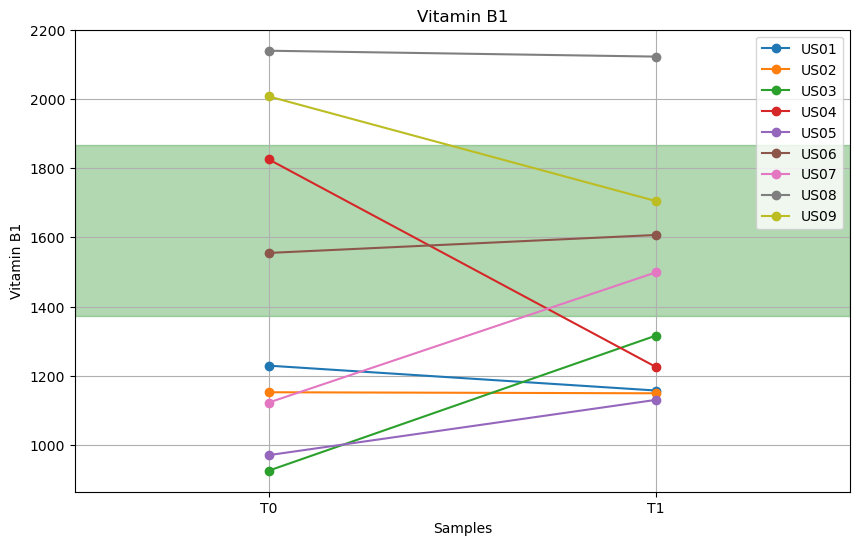


[vitaminab9_full] Paired T-Test Results (T0 vs T1):
t-statistic: -0.1375, p-value: 0.8940
→ Not statistically significant (p ≥ 0.05)
Figure saved as: evolution_vitaminab9_full.png


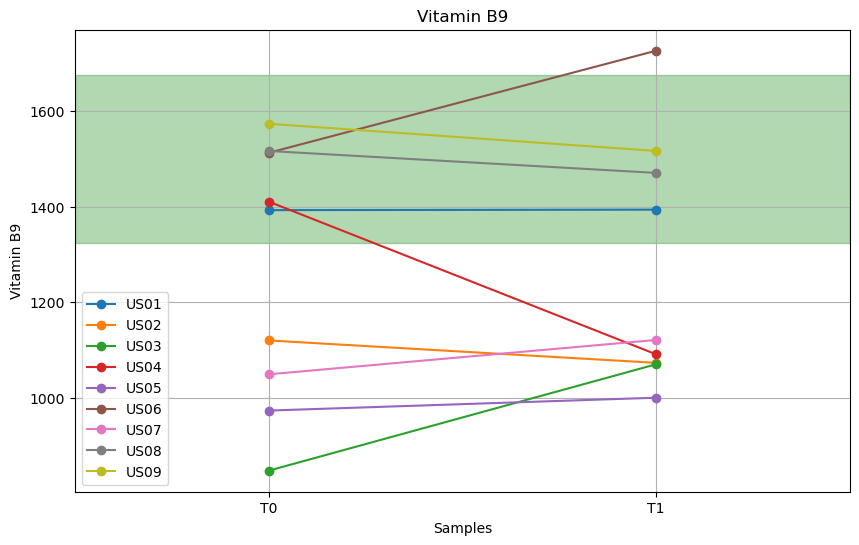


[vitaminab7_full] Paired T-Test Results (T0 vs T1):
t-statistic: -2.0015, p-value: 0.0803
→ Not statistically significant (p ≥ 0.05)
Figure saved as: evolution_vitaminab7_full.png


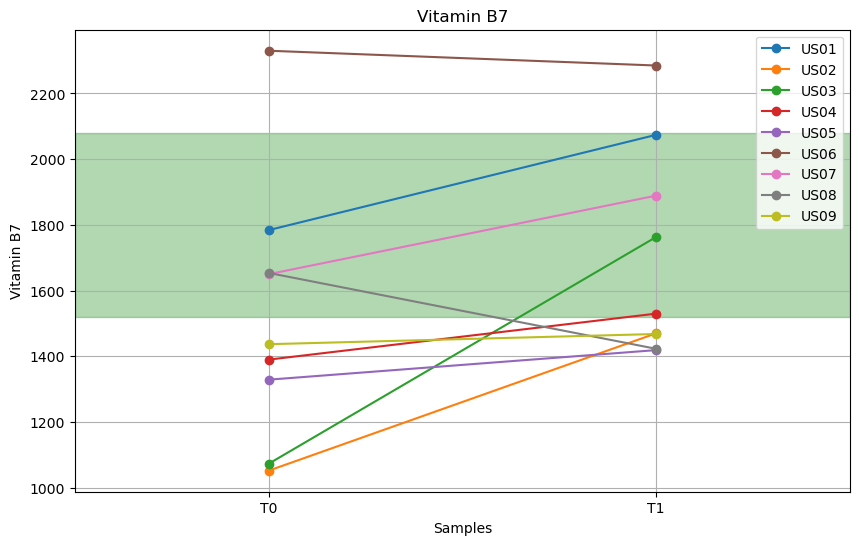


[vitaminak2_full] Paired T-Test Results (T0 vs T1):
t-statistic: 0.2225, p-value: 0.8295
→ Not statistically significant (p ≥ 0.05)
Figure saved as: evolution_vitaminak2_full.png


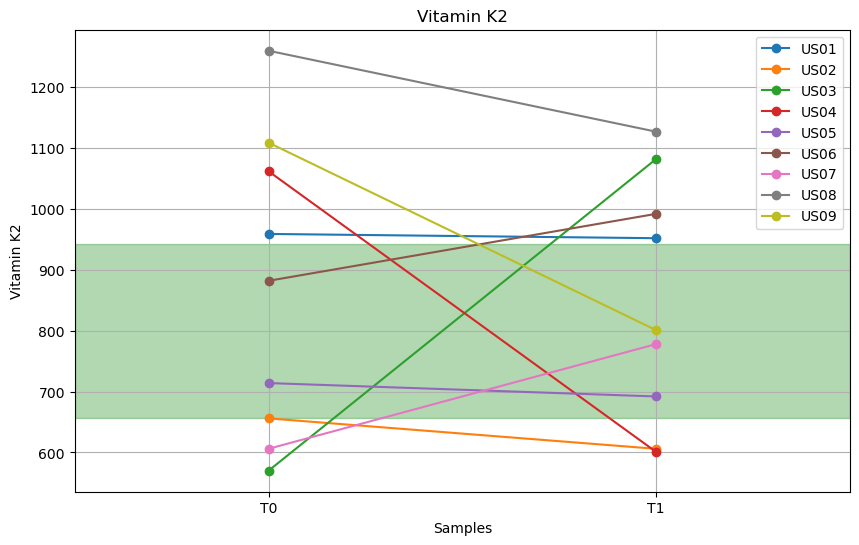

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel

# Kit dictionaries
kits_pre = {
    'US01': 'B000610', 'US02': 'A049611', 'US03': 'A143406',
    'US04': 'A048102', 'US05': 'A000610', 'US06': 'A003710',
    'US07': 'A014605', 'US08': 'Z032908', 'US09': 'A027810'
}
kits_post = {
    'US01': 'B000501', 'US02': 'B001302', 'US03': 'B002702',
    'US04': 'B003808', 'US05': 'B001509', 'US06': 'B001204',
    'US07': 'B002506', 'US08': 'B002103', 'US09': 'B002408'
}

# Generic function to analyze and plot any variable
def analyze_variable(variable, shaded_range=None, y_label=None):
    data_to_plot = []

    for user in kits_pre.keys():
        kit_pre = kits_pre[user]
        kit_post = kits_post[user]

        pre = mx_combined[
            (mx_combined['id_usuario'] == user) & (mx_combined['kit_padre_id'] == kit_pre)
        ]
        post = mx_combined[
            (mx_combined['id_usuario'] == user) & (mx_combined['kit_padre_id'] == kit_post)
        ]

        if not pre.empty and not post.empty:
            val_pre = pre[variable].values[0]
            val_post = post[variable].values[0]
            data_to_plot.append((user, val_pre, val_post))

    if not data_to_plot:
        print(f"No data available for variable: {variable}")
        return

    df_plot = pd.DataFrame(data_to_plot, columns=['User', 'Pre', 'Post'])

    # Paired t-test
    t_stat, p_value = ttest_rel(df_plot['Pre'], df_plot['Post'])
    print(f"\n[{variable}] Paired T-Test Results (T0 vs T1):")
    print(f"t-statistic: {t_stat:.4f}, p-value: {p_value:.4f}")
    if p_value < 0.05:
        print("→ Statistically significant change (p < 0.05)")
    else:
        print("→ Not statistically significant (p ≥ 0.05)")

    # Plotting
    plt.figure(figsize=(10, 6))
    for _, row in df_plot.iterrows():
        plt.plot([1, 2], [row['Pre'], row['Post']], marker='o', label=row['User'])

    if shaded_range:
        plt.axhspan(*shaded_range, color='green', alpha=0.3)

    plt.title(y_label)
    plt.xlabel('Samples')
    plt.ylabel(y_label if y_label else variable)
    plt.xticks([1, 2], ['T0', 'T1'])
    plt.xlim(0.5, 2.5)
    plt.legend()
    plt.grid(True)
    file_name = f"evolution_{variable}.png"
    plt.savefig(file_name, format='png', dpi=300, bbox_inches='tight')
    print(f"Figure saved as: {file_name}")
    plt.show()

# List of variables to analyze: (column_name, shaded_range (optional), y-axis label)
variables_to_analyze = [
    ("riqueza", (332.8, 391.8), "Richness"),
    ("divalfa", (2.82, 3.2), "Alpha Diversity"),
    ("scfa_full", (1170.9, 1647.2), "SCFA abundance"),
    ("evenness", (0.48, 0.54), "Evenness"),
    ("tma_full", (33.91, 80.27), "TMA abundance"),
    ("vitaminab12_full", (909.2, 1243.7), "Vitamin B12"),
    ("vitaminab1_full", (1371.6, 1867.2), "Vitamin B1"),
    ("vitaminab9_full", (1323.6, 1675.8), "Vitamin B9"),
    ("vitaminab7_full", (1519, 2079), "Vitamin B7"),
    ("vitaminak2_full", (657.4, 942.7), "Vitamin K2")
]

# Run analysis for all variables
for var, shaded, ylabel in variables_to_analyze:
    analyze_variable(var, shaded_range=shaded, y_label=ylabel)
